# **1. Perkenalan Dataset**


Dataset yang digunakan adalah dataset bank transaction for fraud detection dari Kaggle.\
Berikut URLnya https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection\
Pada dataset diatas terlihat banyak sekali kolom yaitu
1. TransactionID = Kolom tersebut memuat id transaksi yang terjadi
2. AccountID = Kolom tersebut memuat id pelanggan yang melakukan transaksi
3. TransactionAmount = Kolom tersebut memuat jumlah uang yang diberikan pada transaksi
4. TransactionData = Kolom tersebut berisikan kapan transaksi dilakukan
5. TransactionType = Kolom tersebut berisikan jenis transaksi yang dilakukan
6. Location = Kolom tersebut berisikan tempat transaksi tersebut dilakukan
7. DeviceID = Kolom tersebut berisikan id perangkat yang digunakan untuk transaksi
8. IPAddress = Kolom tersebut berisikan nomor IP perangkat yang melakukan transaksi
9. MerchantID = Kolom tersebut berisikan id merchant yang digunakan untuk transaksi
10. Channel = Kolom tersebut berisikan jaringan yang digunakan untuk transaksi
11. CustomerAge = Kolom tersebut berisikan umur pelanggan yang melakukan transaksi
12. CustomerOccupation = Kolom tersebut berisikan pekerjaan pelanggan yang melakukan transaksi
13. TransactionDuration = Kolom tersebut berisikan durasi transaksi berlangsung
14. LoginAttempts = Kolom tersebut berisikan berapa banyak login dilakukan pada transaksi
15. AccountBalance = Kolom tersebut berisikan berapa banyak saldo yang tersedia pada akun
16. PreviousTransactionDate = Kolom tersebut berisikan kapan transaksi terakhir dilakukan

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFECV

# **3. Memuat Dataset**

Pada tahap ini, dataset dimuat dan dilihat isinya.

In [5]:
bank_df = pd.read_csv("bank_transactions_data_2.csv")
bank_df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

### 1. Memahami Struktur Data

In [6]:
bank_df.shape

(2512, 16)

Dataset terdiri dari 2512 baris dan 16 kolom.

In [7]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [8]:
bank_df.duplicated().sum()

np.int64(0)

Terdapat 11 kolom bertipe data string, 2 kolom bertipe data float/desimal, 3 kolom bertipe data integer/bilangan bulat. Pada data tidak ditemukan data yang terduplikasi.

### 2. Menangani Data Hilang

In [9]:
bank_df.isnull().sum()

,0
TransactionID,0
AccountID,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


Karena tidak ada data hilang maka proses ini akan dilewati

### 3. Analisis Distribusi dan Korelasi

In [10]:
bank_df.drop(columns='TransactionID').describe(include='all')

,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2512,2512.000000,2512,2512,2512,2512,2512,2512,2512,2512.000000,2512,2512.000000,2512.000000,2512.000000,2512
unique,495,NaN,2512,2,43,681,592,100,3,NaN,4,NaN,NaN,NaN,360
top,AC00460,NaN,2023-04-03 16:07:53,Debit,Fort Worth,D000548,200.136.146.93,M026,Branch,NaN,Student,NaN,NaN,NaN,2024-11-04 08:09:17
freq,12,NaN,1,1944,70,9,13,45,868,NaN,657,NaN,NaN,NaN,16
mean,NaN,297.593778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.673965,NaN,119.643312,1.124602,5114.302966,NaN
std,NaN,291.946243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.792198,NaN,69.963757,0.602662,3900.942499,NaN
min,NaN,0.260000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,10.000000,1.000000,101.250000,NaN
25%,NaN,81.885000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,63.000000,1.000000,1504.370000,NaN
50%,NaN,211.140000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,112.500000,1.000000,4735.510000,NaN
75%,NaN,414.527500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,161.000000,1.000000,7678.820000,NaN


Dilihat dari data yang muncul diatas didapatkan bahwa:
1. CustomerAge beragam dari rentang 18 hingga ke 80 dimana standar deviasinya bernilai 18 yang berarti usianya beragam dan rata-ratanya bernilai 44 yang berarti rata-rata umur pelaku transaksi adalah umur 44.
2. TransactionDuration disini cukup beragam dari 10 hingga ke 300 dimana terlihat rata-rata durasi transaksi berupa 119,64 yang berarti rata-rata durasi transaksi selama 2 menit. Harus dicek juga mengapa transaksi bisa memakan waktu hingga 5 menit apakah sebuah kesalahan data atau outlier.
3. LoginAttempts disini terlihat terdapat min max yang rentangnya cukup jauh yaitu dari 1 sampai ke 5. Rata-rata login yang diperlukan yaitu 1 kali login saja. Harus dicek apakah 5 kali login ini termasuk outlier atau ada sesuatu yang menyebabkannya.
4. AccountBalance disini terlihat rata-rata pengguna memiliki saldo berupa 5114 dollar. Rentang data juga cukup beragam dari 101 hingga 14977. Nantinya max yang terlalu jauh ini harus dicek apakah kesalahan data atau outlier yang menyebabkan data tersebut muncul.
5. TransactionType yang berupa Debit dan Credit harus diubah sebelum data diolah untuk training nantinya.
6. CustomerOccupation yang berupa pekerjaan penngguna harus diubah karena pekerjaan individu yang berbeda dan beragam.

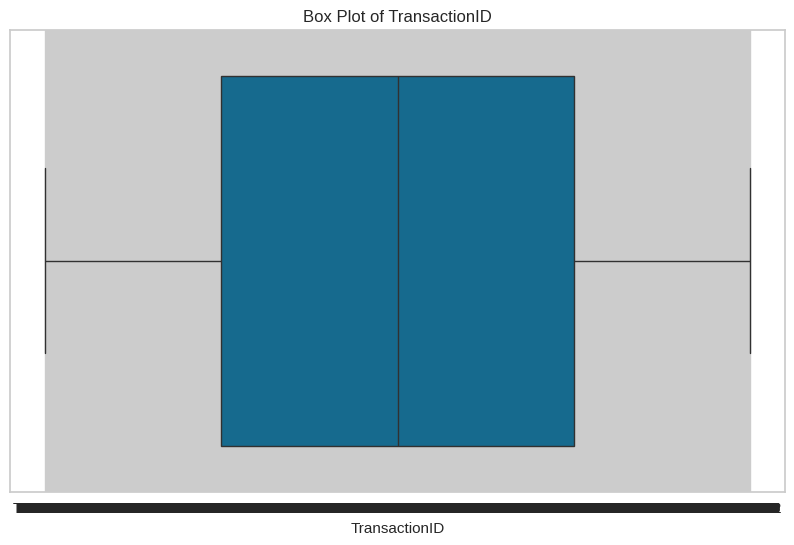

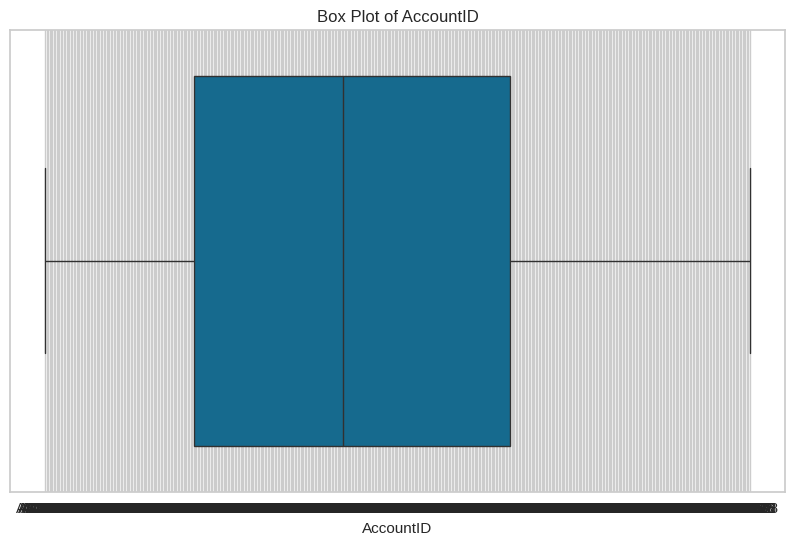

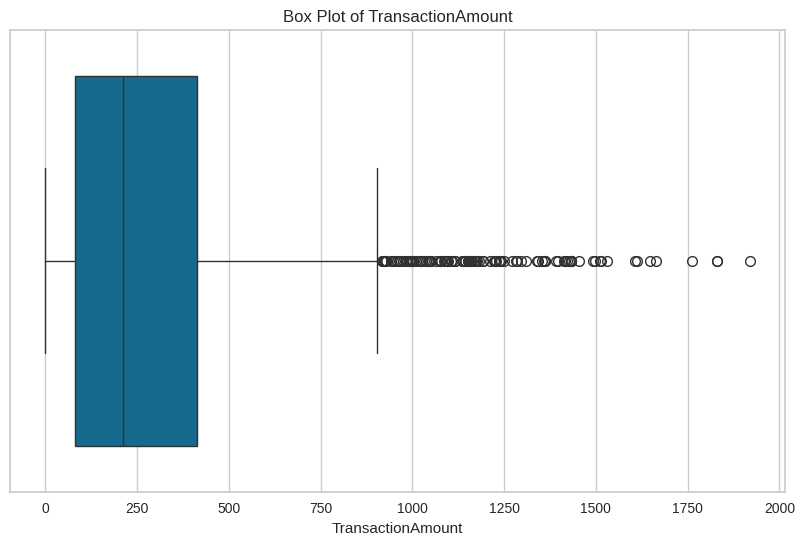

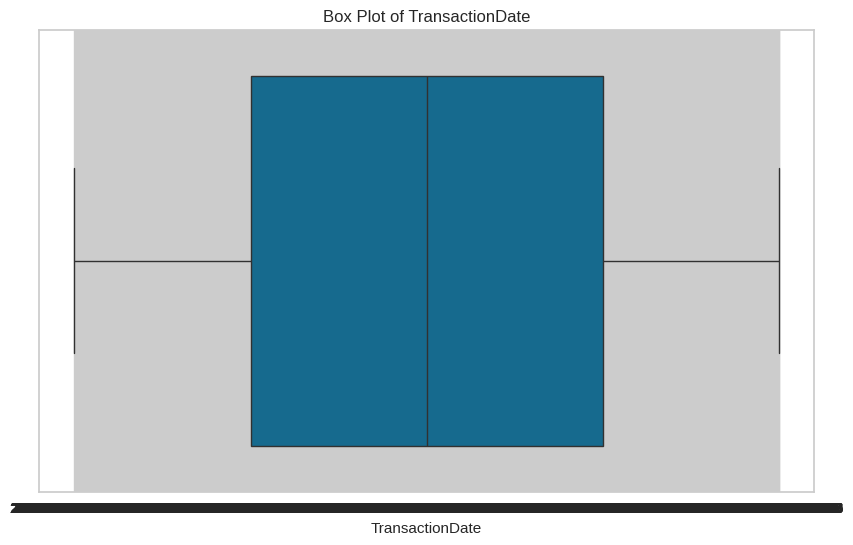

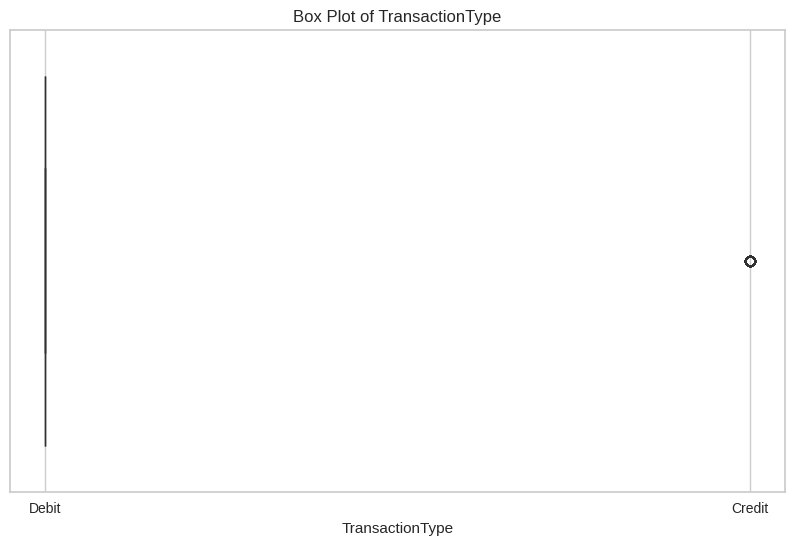

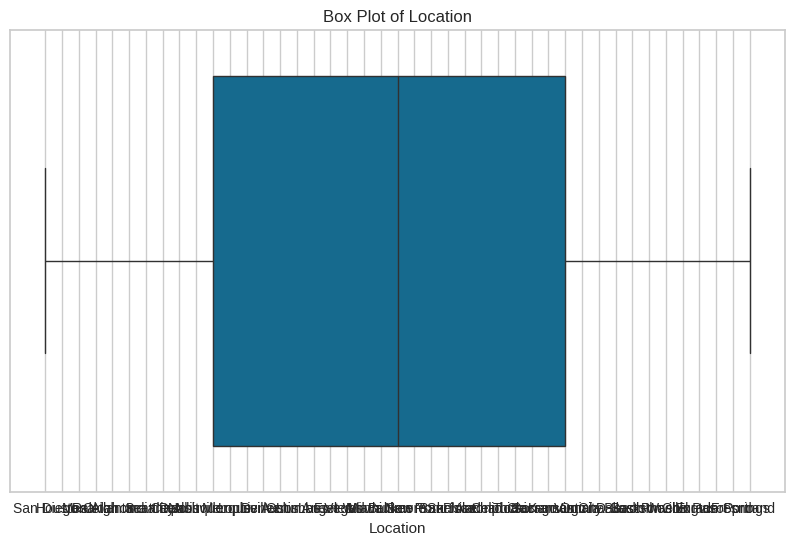

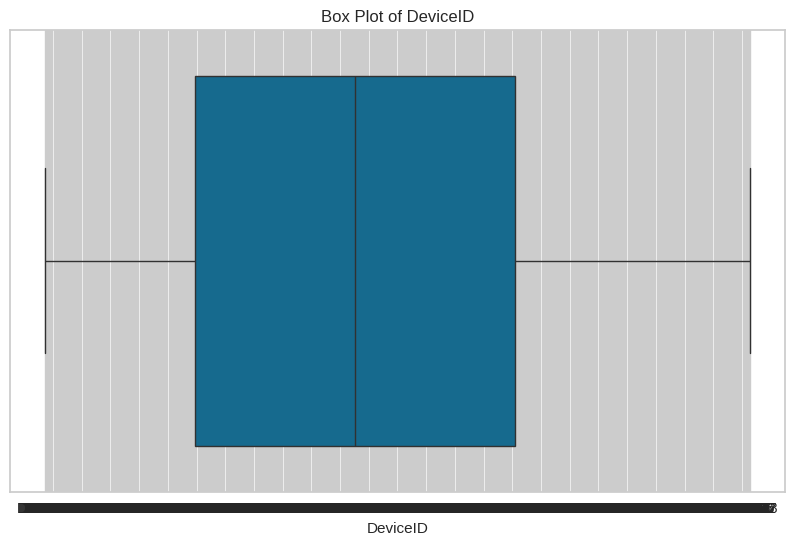

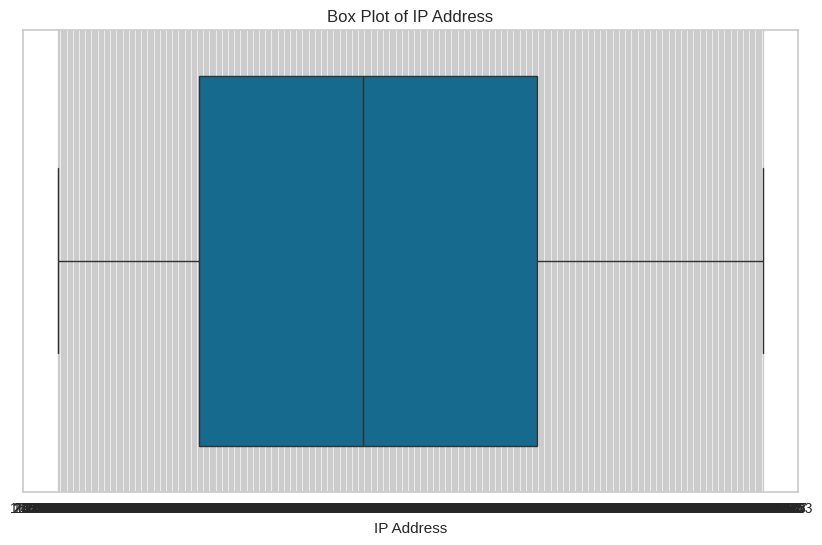

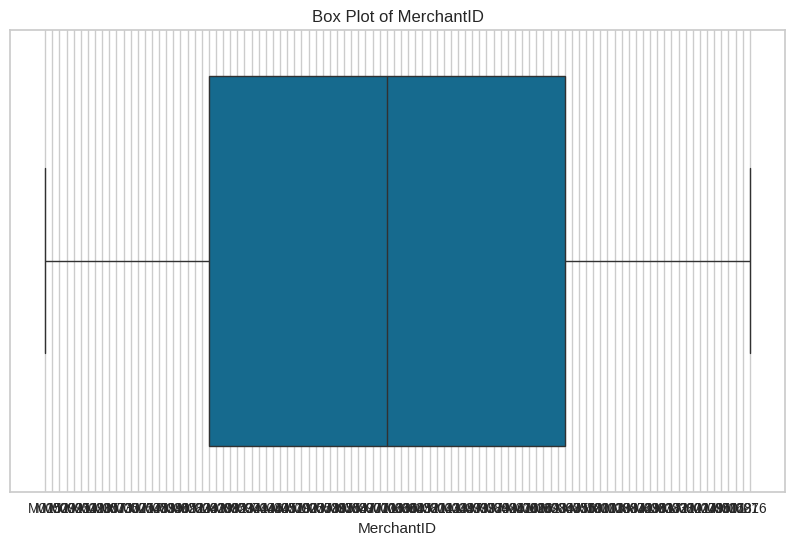

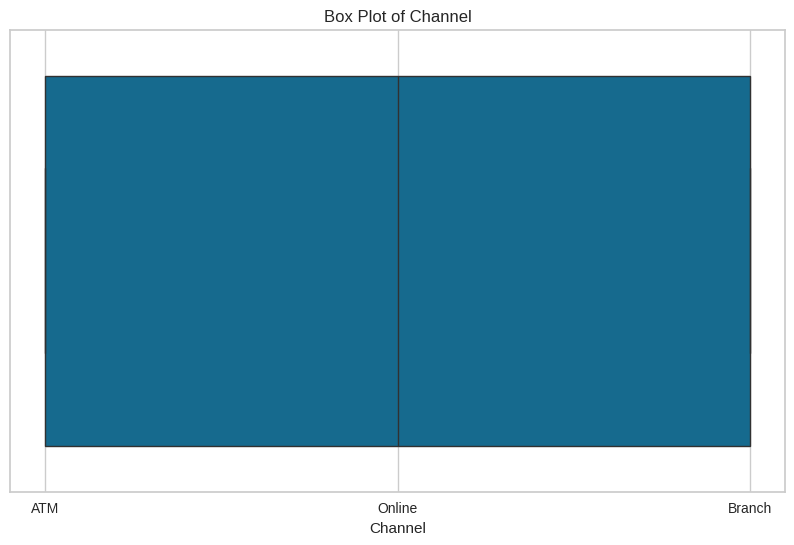

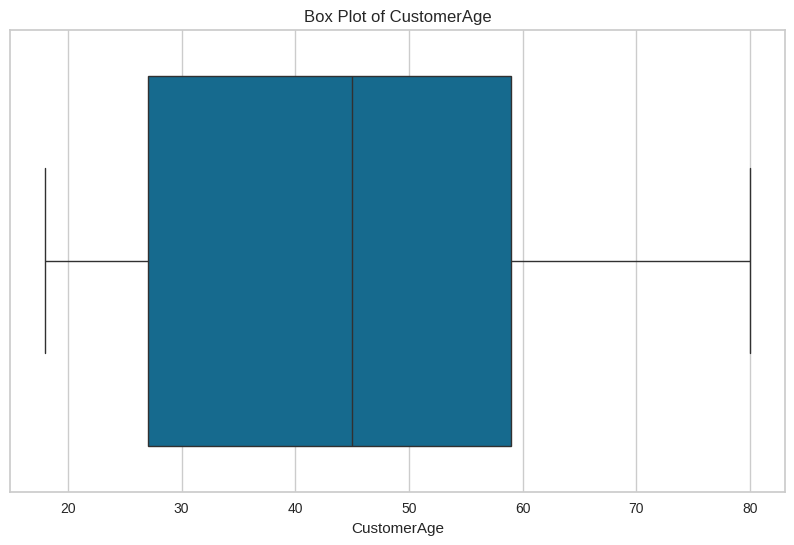

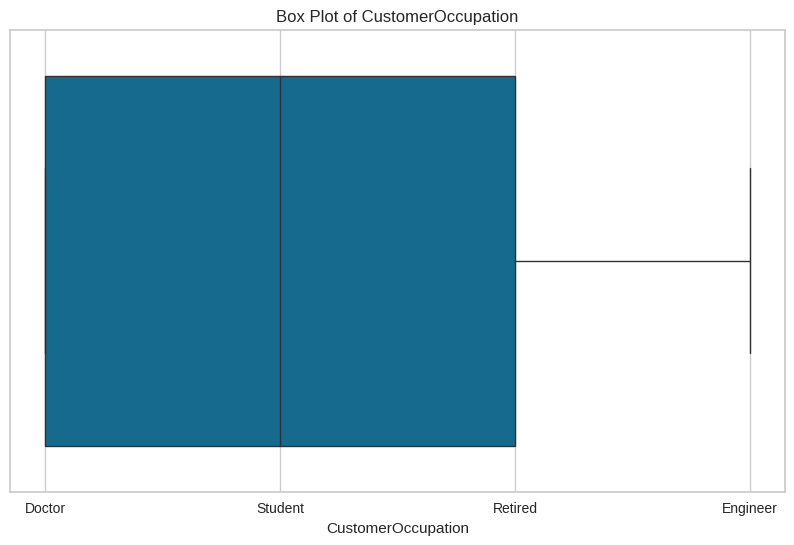

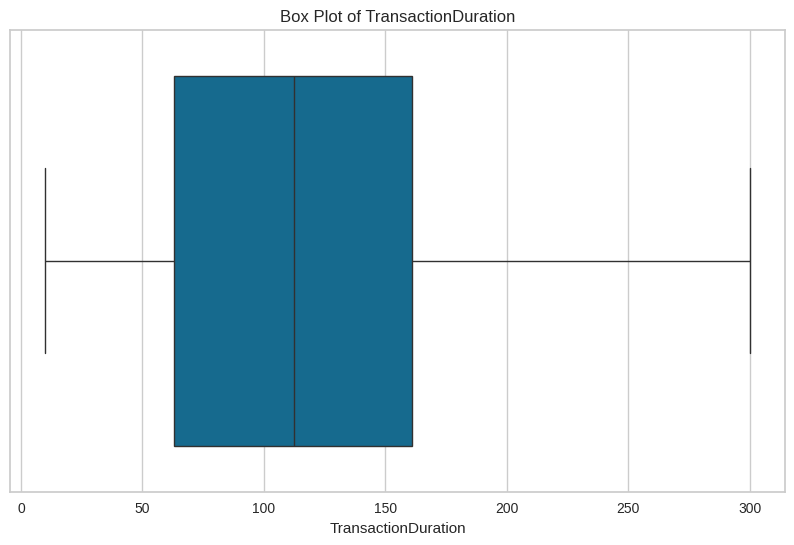

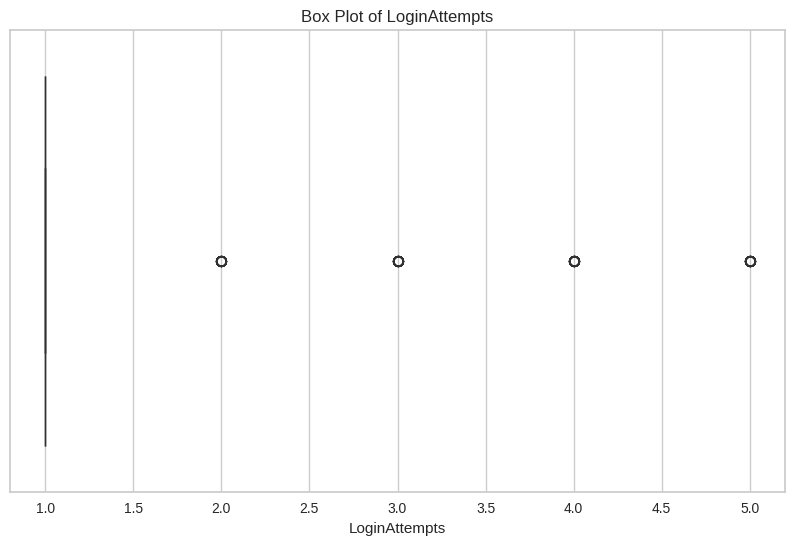

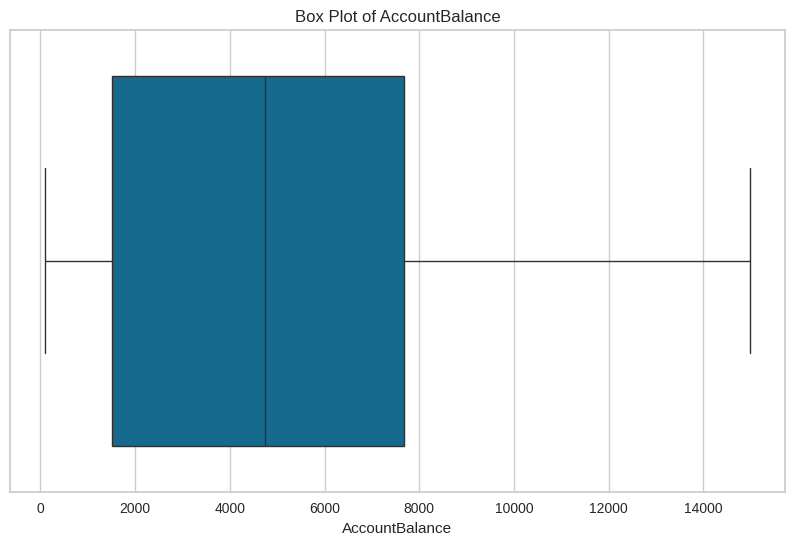

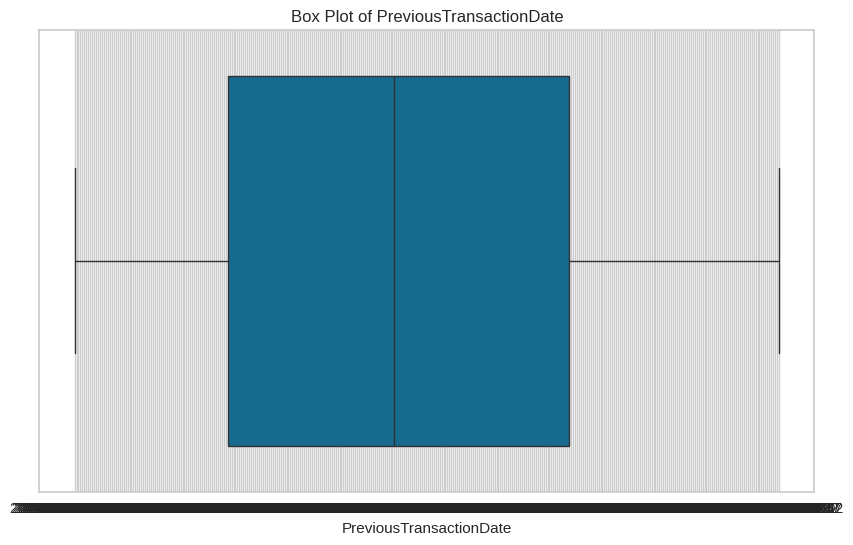

In [11]:
for feature in bank_df.columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=bank_df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

In [12]:
matriks_correlation = bank_df.drop(columns=['TransactionID','AccountID','TransactionType','TransactionDate','Location','DeviceID','IP Address', 'MerchantID', 'Channel', 'CustomerOccupation', 'PreviousTransactionDate']).corr()
print(matriks_correlation)

                     TransactionAmount  CustomerAge  TransactionDuration  \
TransactionAmount             1.000000    -0.025616             0.004359   
CustomerAge                  -0.025616     1.000000            -0.017936   
TransactionDuration           0.004359    -0.017936             1.000000   
LoginAttempts                -0.008445     0.007653             0.032639   
AccountBalance               -0.025165     0.319942             0.005577   

                     LoginAttempts  AccountBalance  
TransactionAmount        -0.008445       -0.025165  
CustomerAge               0.007653        0.319942  
TransactionDuration       0.032639        0.005577  
LoginAttempts             1.000000        0.014999  
AccountBalance            0.014999        1.000000  


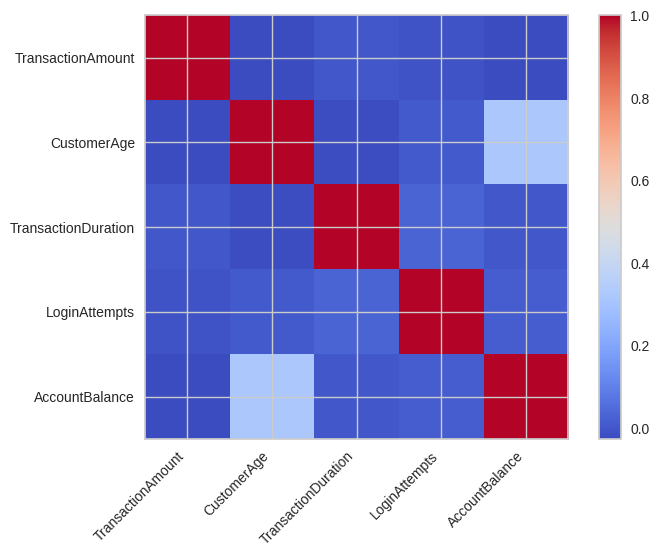

In [13]:
plt.imshow(matriks_correlation, cmap='coolwarm')

plt.colorbar()

variable = []
for i in matriks_correlation.columns:
    variable.append(i)

plt.xticks(range(len(matriks_correlation)), variable, rotation=45, ha='right')
plt.yticks(range(len(matriks_correlation)),variable)

plt.show()

Pada matriks tersebut dapat dilihat bahwa tidak ada yang memiliki korelasi yang kuat diatas, hanya terlihat bahwa customerage memiliki korelasi paling tinggi berupa 0.6 dengan accountbalance yang dimana semakin tua seorang customer maka semakin tinggi accountbalancenya.

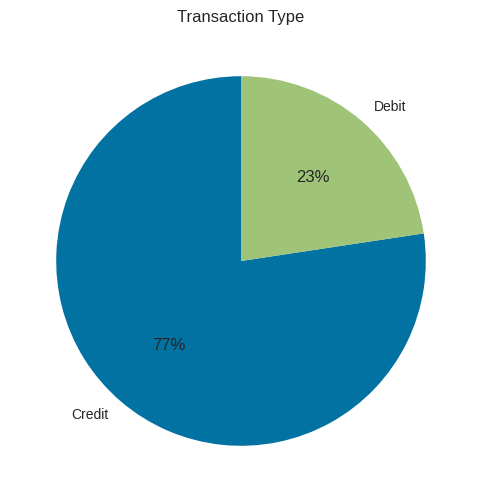

In [14]:
plt.figure(figsize=(10,6))
plt.pie(bank_df['TransactionType'].value_counts(), labels=['Credit', 'Debit'],startangle=90,autopct='%1.0f%%')
plt.title('Transaction Type')
plt.show()

Terlihat bahwa terdapat 23% pengguna yang menggunakan Debit untuk transaksi dan 77% pengguna yang menggunakan Credit.

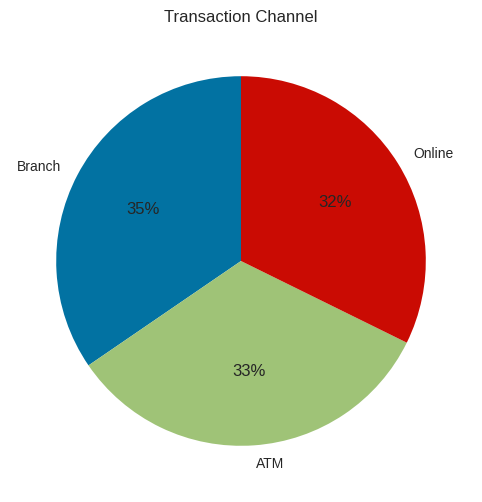

In [15]:
plt.figure(figsize=(10,6))
plt.pie(bank_df['Channel'].value_counts(), labels=['Branch', 'ATM', 'Online'],startangle=90,autopct='%1.0f%%')
plt.title('Transaction Channel')
plt.show()

Terlihat dari gambar diatas terdapat 35% pengguna yang menggunakan channel cabang/branch, 32% pengguna yang menggunakan channel online dan 33% pengguna yang menggunakan channel ATM.

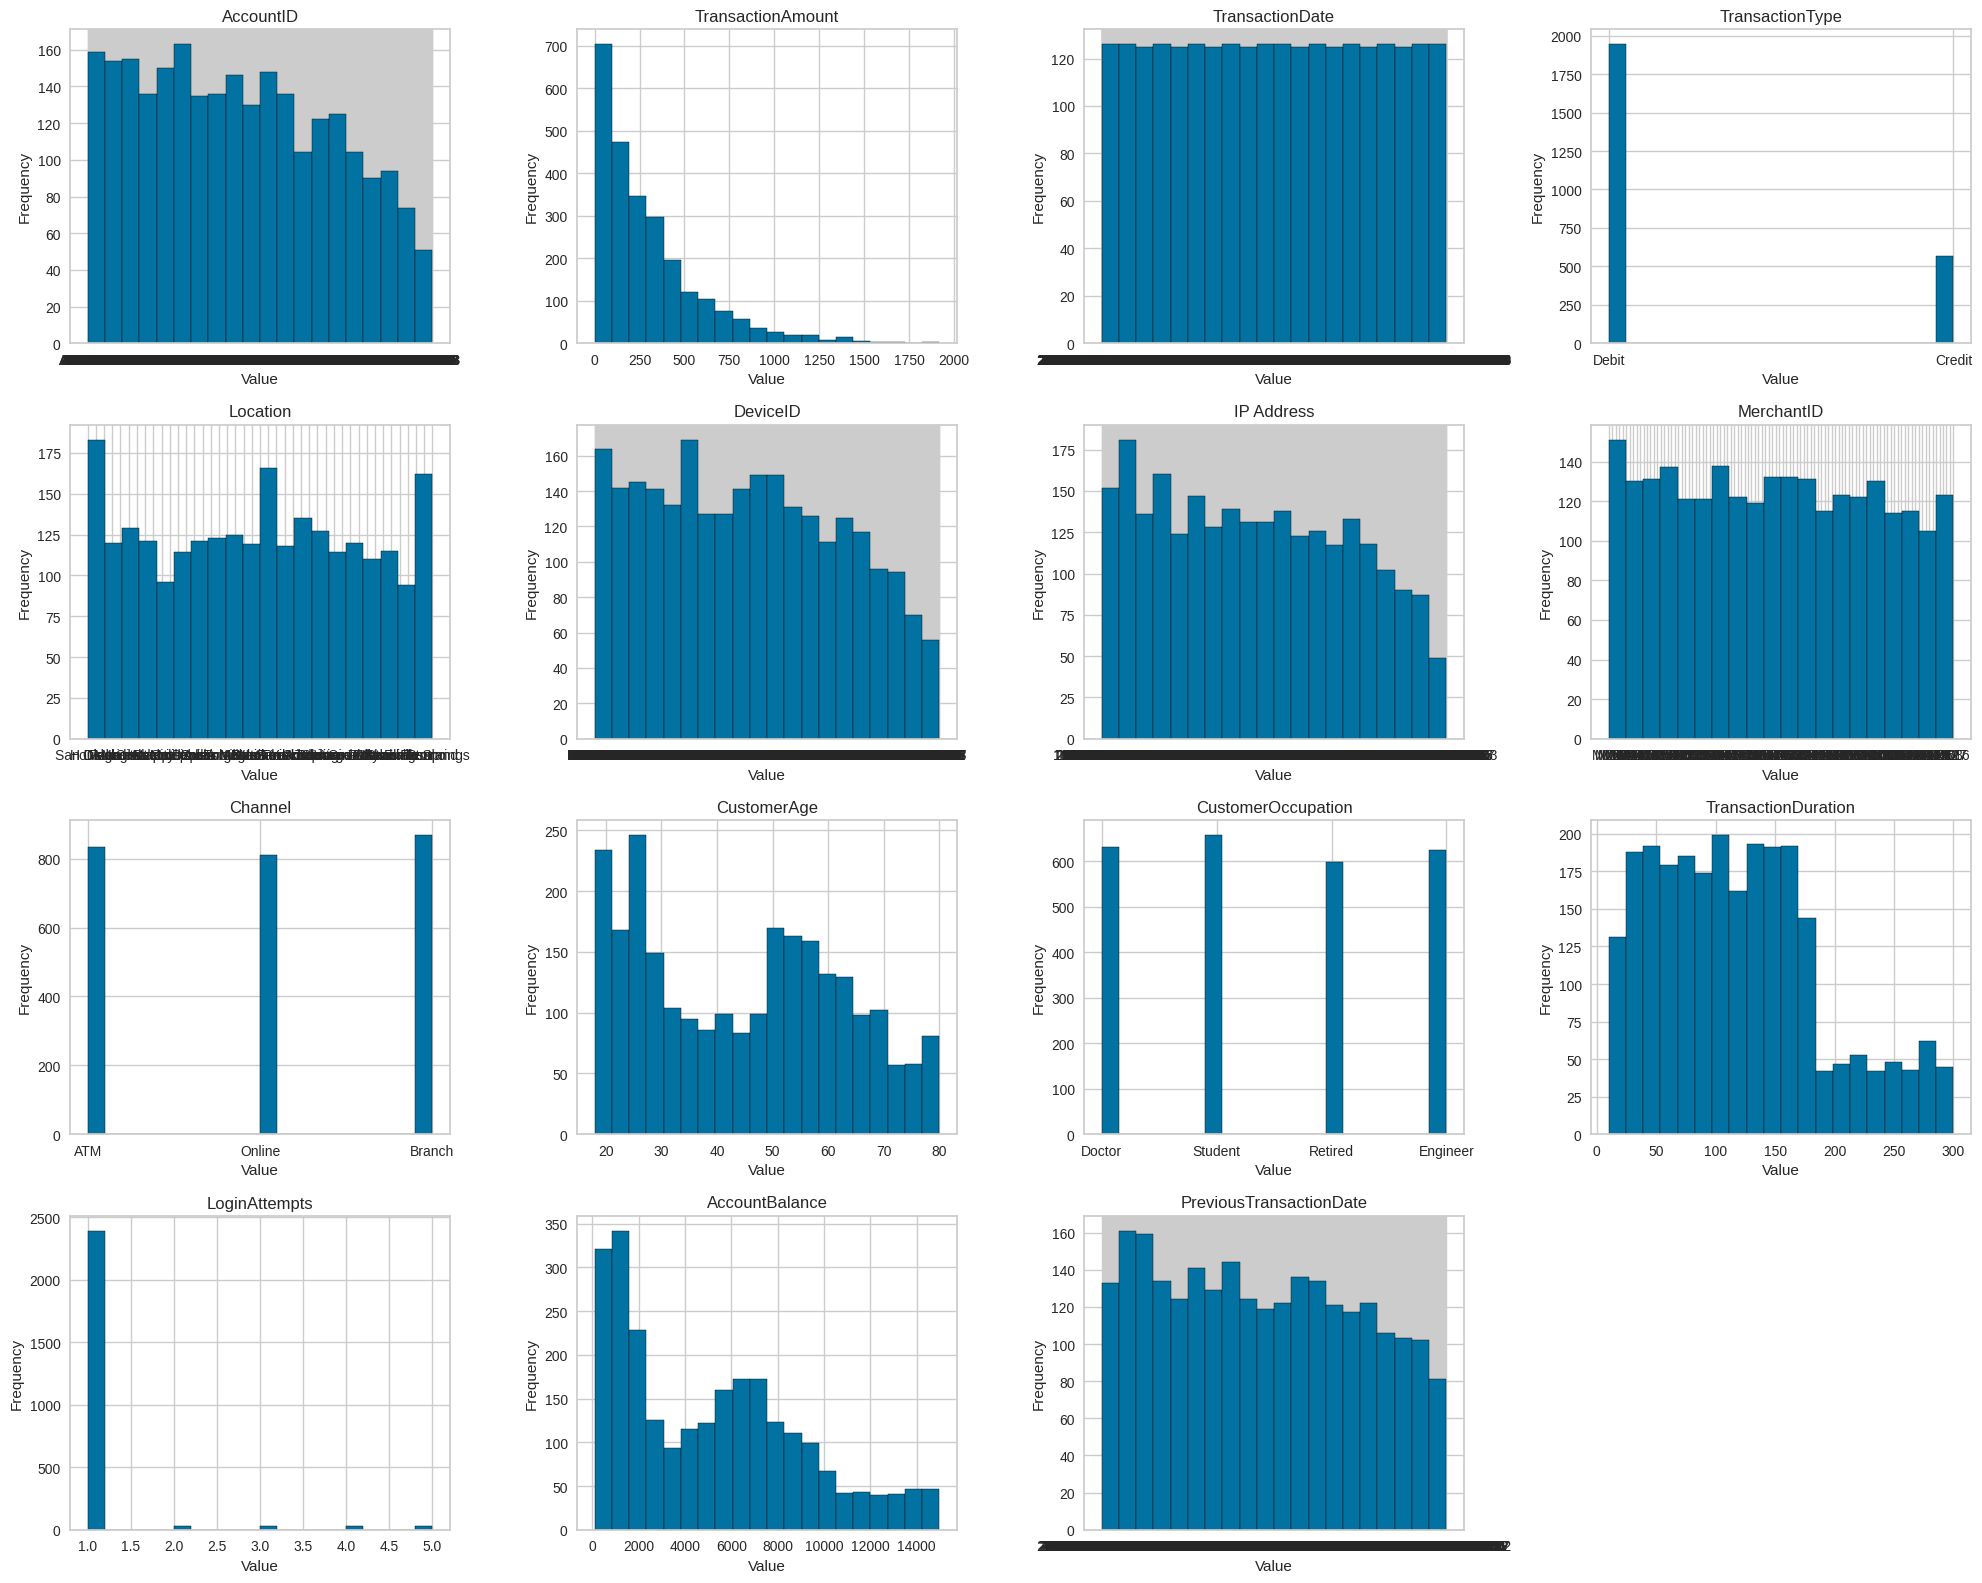

In [16]:
# Menghitung jumlah variabel
num_vars = bank_df.shape[1]

# Menentukan jumlah baris dan kolom untuk grid subplot
n_cols = 4  # Jumlah kolom yang diinginkan
n_rows = -(-num_vars // n_cols)  # Ceiling division untuk menentukan jumlah baris

# Membuat subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))

# Flatten axes array untuk memudahkan iterasi jika diperlukan
axes = axes.flatten()

# Plot setiap variabel
for i, column in enumerate(bank_df.drop(columns=["TransactionID"]).columns):
    bank_df[column].hist(ax=axes[i], bins=20, edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Menghapus subplot yang tidak terpakai (jika ada)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Menyesuaikan layout agar lebih rapi
plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

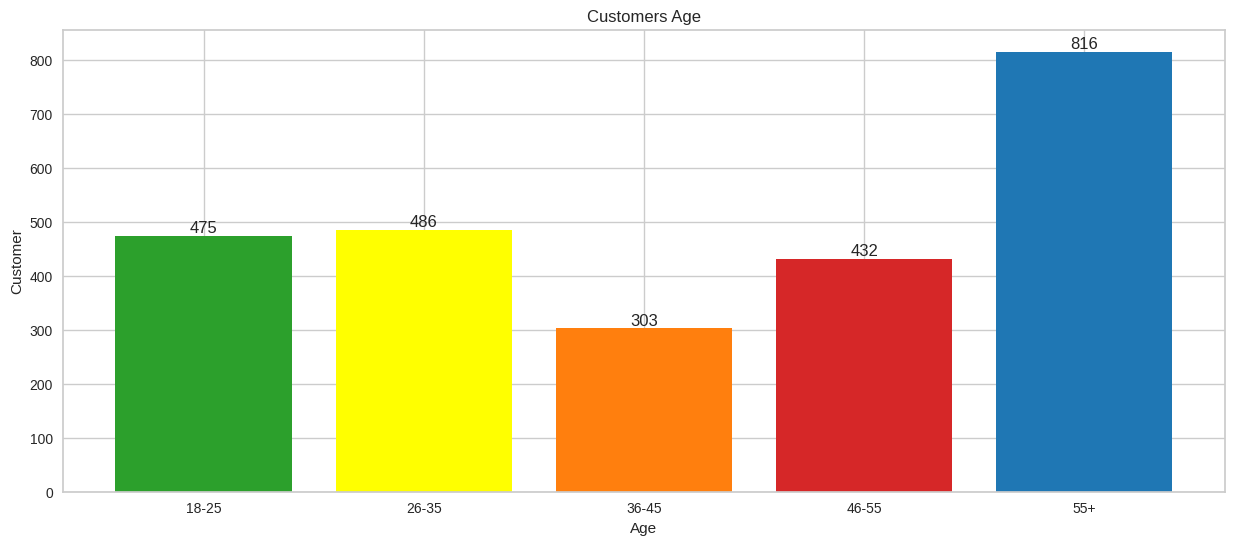

In [17]:
age18_25 = bank_df.CustomerAge[(bank_df.CustomerAge >= 18) & (bank_df.CustomerAge <= 25)]
age26_35 = bank_df.CustomerAge[(bank_df.CustomerAge >= 26) & (bank_df.CustomerAge <= 35)]
age36_45 = bank_df.CustomerAge[(bank_df.CustomerAge >= 36) & (bank_df.CustomerAge <= 45)]
age46_55 = bank_df.CustomerAge[(bank_df.CustomerAge >= 46) & (bank_df.CustomerAge <= 55)]
age56above = bank_df.CustomerAge[bank_df.CustomerAge >= 56]

x = ['18-25', '26-35', '36-45', '46-55', '55+']
y = [len(age18_25.values), len(age26_35.values), len(age36_45.values), len(age46_55.values), len(age56above.values)]

plt.figure(figsize=(15,6))
plt.bar(x,y, color=['tab:green','yellow', 'tab:orange', 'tab:red', 'tab:blue'])
plt.title('Customers Age')
plt.xlabel('Age')
plt.ylabel('Customer')

for i in range(len(x)):
    plt.text(i, y[i],y[i], ha='center', va='bottom')

plt.show()

Terlihat dari barplot diatas bahwa terdapat 475 pengguna 18-25 tahun, 486 pengguna 26-35 tahun, 303 pengguna 36-45 tahun, 432 pengguna 46-55 tahun, 816 pengguna 55+ tahun. Terlihat juga bahwa pengguna didominasi oleh usia 55+ tahun.

In [18]:
labelencoder = LabelEncoder()

bank_df['TransactionType'] =labelencoder.fit_transform(bank_df['TransactionType'])

bank_df['TransactionType'].unique()

array([1, 0])

Dari kedua tipe transaksi tersebut dilakukannya encode untuk memisahkan kategori tipe transaksinya agar bisa diolah nantinya.

In [19]:
bank_df['Channel'] =labelencoder.fit_transform(bank_df['Channel'])

bank_df['Channel'].unique()

array([0, 2, 1])

Ketiga channel jaringan yang digunakan untuk transaksi juga di encode agar data maksimal dapat diuji pada model.

In [20]:
bank_df = bank_df[['TransactionAmount', 'CustomerAge', 'TransactionType','LoginAttempts', 'Channel','TransactionDuration','AccountBalance']]
bank_df.head()

,TransactionAmount,CustomerAge,TransactionType,LoginAttempts,Channel,TransactionDuration,AccountBalance
0,14.09,70,1,1,0,81,5112.21
1,376.24,68,1,1,0,141,13758.91
2,126.29,19,1,1,2,56,1122.35
3,184.50,26,1,1,2,25,8569.06
4,13.45,26,0,1,2,198,7429.40


Menghapus data yang tidak digunakan agar nanti lebih akurat pada saat diuji.

In [21]:
# def hapus_outlier(df):
#     Q1 = df.quantile(0.25)
#     Q3 = df.quantile(0.75)
#     IQR = Q3-Q1

#     lowerb = Q1-1.5 *IQR
#     upperb = Q3+1.5 *IQR

#     clean = df[~((df<lowerb) | (df>upperb)).any(axis=1)]
#     return clean

# x_bank_df =  bank_df[['TransactionAmount', 'CustomerAge', 'TransactionType','LoginAttempts', 'Channel','TransactionDuration','AccountBalance']]
# cleaned_bank_df = hapus_outlier(x_bank_df)


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [22]:
kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(bank_df)
kmeans_label = kmeans.labels_

bank_df.loc[:,'KMeans_cluster'] = kmeans_label

k=3

def analyze_cluster(x, label, k):
  print('Analisis Karakteristik Setiap Cluster:')
  for i in range(k):
    cluster_data = x[label == i]

    mean_ta = cluster_data['TransactionAmount'].mean()
    mean_ca = cluster_data['CustomerAge'].mean()
    mean_tt = cluster_data['TransactionType'].mean()
    mean_la = cluster_data['LoginAttempts'].mean()
    mean_ch = cluster_data['Channel'].mean()
    mean_td = cluster_data['TransactionDuration'].mean()
    mean_ab = cluster_data['AccountBalance'].mean()

    print(f'Cluster {i + 1}:')
    print(f'Rata-rata TransactionAmount: {mean_ta:.2f}')
    print(f'Rata-rata CustomerAge: {np.floor(mean_ca).astype(int)}')
    print(f'Rata-rata TransactionType: {np.floor(mean_tt).astype(int)}')
    print(f'Rata-rata LoginAttempts:{np.floor(mean_la).astype(int)}')
    print(f'Rata-rata Channel: {np.floor(mean_ch).astype(int)}')
    print(f'Rata-rata TransactionDuration: {np.floor(mean_td).astype(int)}')
    print(f'Rata-rata AccountBalance: {np.floor(mean_ab).astype(int)}')

analyze_cluster(bank_df, kmeans_label, k)




Analisis Karakteristik Setiap Cluster:
Cluster 1:
Rata-rata TransactionAmount: 280.40
Rata-rata CustomerAge: 51
Rata-rata TransactionType: 0
Rata-rata LoginAttempts:1
Rata-rata Channel: 1
Rata-rata TransactionDuration: 118
Rata-rata AccountBalance: 6546
Cluster 2:
Rata-rata TransactionAmount: 308.62
Rata-rata CustomerAge: 37
Rata-rata TransactionType: 0
Rata-rata LoginAttempts:1
Rata-rata Channel: 0
Rata-rata TransactionDuration: 119
Rata-rata AccountBalance: 1582
Cluster 3:
Rata-rata TransactionAmount: 306.09
Rata-rata CustomerAge: 47
Rata-rata TransactionType: 0
Rata-rata LoginAttempts:1
Rata-rata Channel: 0
Rata-rata TransactionDuration: 122
Rata-rata AccountBalance: 11621


# Cluster 1
mendapati rata-rata transaction amount berupa 280, rata-rata customer age berupa 51 tahun, rata-rata transaction type berupa credit, rata-rata login attemptnya berupa 1, rata-rata channel yang digunakan yaitu online.

# Cluster 2
mendapati rata-rata transaction amount berupa 308.62, rata-rata customer age berupa 37 tahun, rata-rata transaction type berupa credit, rata-rata login attemptnya berupa 1, rata-rata channel yang digunakan yaitu branch.

# Cluster 3
mendapati rata-rata transaction amount berupa 306.09, rata-rata customer age berupa 47 tahun, rata-rata transcation type berupa credit, rata-rata login attemptnya berupa 1, rata-rata channel yang digunakan yaitu branch.

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

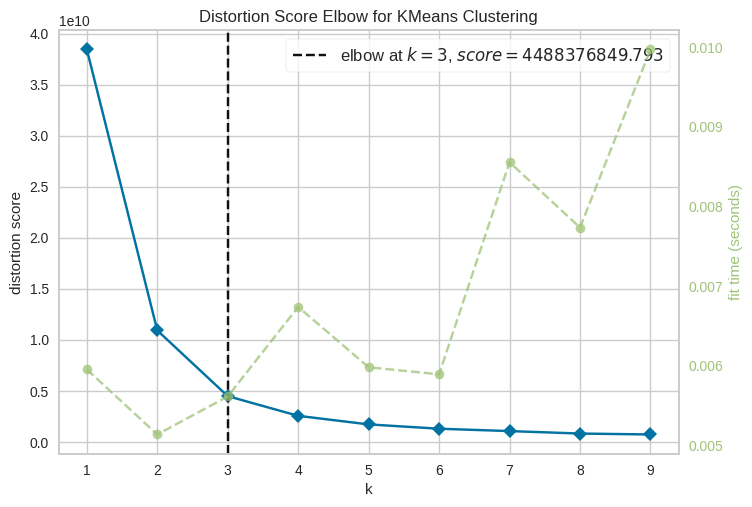

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1,10))
visualizer.fit(bank_df)

visualizer.show()

Didapatkan kluster ideal berupa 3.

In [24]:
kmeans = KMeans(n_clusters=3, random_state=42)

kmeans.fit_predict(bank_df)

score = silhouette_score(bank_df, kmeans.labels_, metric='euclidean')

print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.623


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


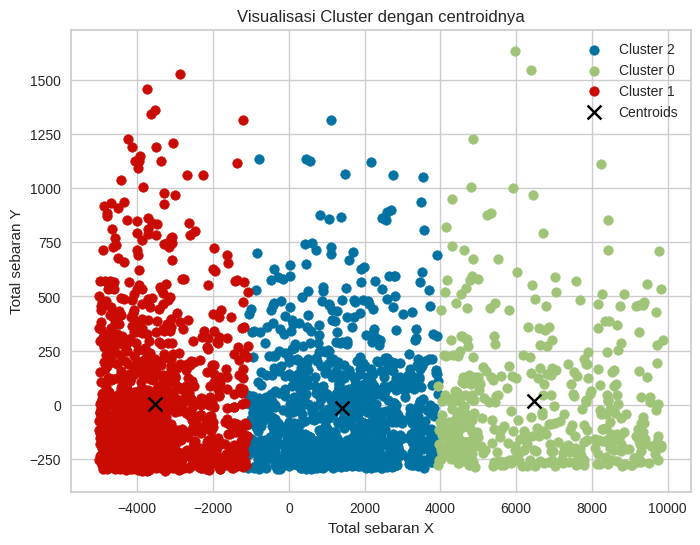

In [25]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(bank_df)
bank_df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
bank_df_pca['cluster'] = kmeans.labels_


plt.figure(figsize=(8, 6))
for cluster_num in bank_df_pca['cluster'].unique():
  cluster_data = bank_df_pca[bank_df_pca['cluster'] == cluster_num]
  plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster_num}')

centroids = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='black', marker='x', label='Centroids')

plt.xlabel('Total sebaran X')
plt.ylabel('Total sebaran Y')
plt.title('Visualisasi Cluster dengan centroidnya')
plt.legend()
plt.show()


In [26]:
score_pca = silhouette_score(bank_df_pca[['PC1', 'PC2']], bank_df_pca['cluster'], metric='euclidean')

print('Silhouetter Score: %.3f' % score_pca)

Silhouetter Score: 0.625


## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [28]:
bank_df['TransactionType'] = labelencoder.inverse_transform(bank_df['TransactionType'])
bank_df['Channel'] = labelencoder.inverse_transform(bank_df['Channel'])

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [47]:
def analyze_cluster_stats(df, label_col='KMeans_cluster'):
    k = df[label_col].nunique()
    print('Analisis Statistik Setiap Cluster:')
    for i in range(k):
        cluster_data = df[df[label_col] == i]

        stats = {}
        for col in ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'AccountBalance', 'LoginAttempts', 'TransactionType', 'Channel']:
          if col in cluster_data.columns:
              if pd.api.types.is_numeric_dtype(cluster_data[col]):
                  stats[col] = {
                      'min': cluster_data[col].min(),
                      'max': cluster_data[col].max(),
                      'mean': cluster_data[col].mean(),
                      'mode': cluster_data[col].mode().iloc[0] if not cluster_data[col].mode().empty else np.nan
                  }
              else:
                  stats[col] = {
                      'mode': cluster_data[col].mode().iloc[0] if not cluster_data[col].mode().empty else np.nan
                  }
        print(f'Cluster {i + 1}:')
        for col, col_stats in stats.items():
            if 'mode' in col_stats:
                print(f'{col}: Mode={col_stats["mode"]}')
            if 'min' in col_stats:
                print(f'{col}: Min={col_stats["min"]:.2f}, Max={col_stats["max"]:.2f}, Mean={col_stats["mean"]:.2f}')
        print()

analyze_cluster_stats(bank_df)

Analisis Statistik Setiap Cluster:
Cluster 1:
TransactionAmount: Mode=3.8
TransactionAmount: Min=0.32, Max=1607.55, Mean=280.40
CustomerAge: Mode=59
CustomerAge: Min=18.00, Max=80.00, Mean=51.65
TransactionDuration: Mode=144
TransactionDuration: Min=10.00, Max=299.00, Mean=118.41
AccountBalance: Mode=7707.96
AccountBalance: Min=4069.17, Max=9088.36, Mean=6546.39
LoginAttempts: Mode=1
LoginAttempts: Min=1.00, Max=5.00, Mean=1.11
TransactionType: Mode=Branch
Channel: Mode=Branch

Cluster 2:
TransactionAmount: Mode=38.15
TransactionAmount: Min=0.26, Max=1830.00, Mean=308.62
CustomerAge: Mode=25
CustomerAge: Min=18.00, Max=80.00, Mean=37.91
TransactionDuration: Mode=63
TransactionDuration: Min=10.00, Max=300.00, Mean=119.46
AccountBalance: Mode=1400.04
AccountBalance: Min=101.25, Max=4064.02, Mean=1582.40
LoginAttempts: Mode=1
LoginAttempts: Min=1.00, Max=5.00, Mean=1.12
TransactionType: Mode=Branch
Channel: Mode=ATM

Cluster 3:
TransactionAmount: Mode=5.29
TransactionAmount: Min=1.14, Max

# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1
Didapatkan karena:
- Variabel TransactionAmount memiliki nilai rata-rata 280,40 dengan batas minimum 0,32 dan batas maksimum 1607,55 serta modus berupa 3,8.
- Variabel CustomerAge memiliki nilai rata-rata 51 dengan batas minimum 18 dan batas maksimum 88 serta modus berupa 59.
- Variabel TransactionDuration memiliki nilai rata-rata 118,41 dengan batas minimum 10 dan batas maksimum 299 serta modus berupa 144.
- Variabel AccountBalance memiliki nilai rata-rata 6546,39 dengan batas minimum 4069,17 dan batas maksimum 9088,36 serta modus berupa 7707,96.
- Variabel LoginAttempts memiliki nilai rata-rata 1,11 dengan batas minimum 1 dan batas maksimum 5 serta modus berupa 1.
- Variabel TransactionType memiliki nilai modus berupa kategori Branch.
- Variabel Channel memiliki nilai modus berupa kategori Branch.

## Cluster 2
Didapatkan karena:
- Variabel TransactionAmount memiliki nilai rata-rata 308,62 dengan batas minimum 0,26 dan batas maksimum 1803,00 serta modus berupa 38,15.
- Variabel CustomerAge memiliki nilai rata-rata 37,91 dengan batas minimum 18 dan batas maksimum 80 serta modus berupa 25.
- Variabel TransactionDuration memiliki nilai rata-rata 119,46 dengan batas minimum 10 dan batas maksimum 300 serta modus berupa 63.
- Variabel AccountBalance memiliki nilai rata-rata 1582,40 dengan batas minimum 101,25 dan batas maksimum 4064,02 serta modus berupa 1400,04.
- Variabel LoginAttempts memiliki nilai rata-rata 1,12 dengan batas minimum 1 dan batas maksimum 5 serta modus berupa 1.
- Variabel TransactionType memiliki nilai modus berupa kategori Branch.
- Variabel Channel memiliki nilai modus berupa kategori ATM.

## Cluster 3
Didapatkan karena:
- Variabel TransactionAmount memiliki nilai rata-rata 306,09 dengan batas minimum 1,14 dan batas maksimum 1919,11 serta modus berupa 5,29.
- Variabel CustomerAge memiliki nilai rata-rata 47,55 dengan batas minimum 18 dan batas maksimum 70 serta modus berupa 68.
- Variabel TransactionDuration memiliki nilai rata-rata 122,93 dengan batas minimum 11 dan batas maksimum 300 serta modus berupa 141.
- Variabel AccountBalance memiliki nilai rata-rata 11621,09 dengan batas minimum 9095,14 dan batas maksimum 14977,99 serta modus berupa 9095,14.
- Variabel LoginAttempts memiliki nilai rata-rata 1,17 dengan batas minimum 1 dan batas maksimum 5 serta modus berupa 1.
- Variabel TransactionType memiliki nilai modus berupa kategori Branch.
- Variabel Channel memiliki nilai modus berupa kategori ATM.

# Analisis Pola
Dari ketiga cluster tersebut bisa dimasukkan dalam logika berbisnis dimana
## cluster 1
adalah usia pensiunan yang telah berhemat sembari menjalani hidup dengan uang pensiun.
## cluster 2
adalah usia masih bekerja yang masih sering berbelanja dan bertransaksi.
## cluster 3
adalah usia yang sudah mulai hidup berhemat namun tidak terlalu banyak.

### Pendapat pribadi
Menurut saya dari pola tersebut bisa diterapkan pada suatu bisnis karena jika target pasar sebuah bisnis adalah orang yang masih bekerja dan berani mengeluarkan uang maka cluster 2 dan 3 adalah target bisnis yang baik. Namun jika targetnya adalah orang pensiunan yang berhemat maka target bisnisnya adalah cluster 1.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [31]:
bank_df.to_csv('bank_df.csv', index=False)